In [12]:
#Pertama

# Library dasar untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning dari scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    f1_score
)

# Library untuk menyimpan model
import joblib

# Pengaturan visualisasi
plt.style.use('ggplot')
sns.set_palette("husl")
import warnings
warnings.filterwarnings('ignore')

print("Semua library berhasil di-import!")

Semua library berhasil di-import!


In [14]:
# Kedua

# Load dataset dari file CSV
df = pd.read_csv('pred_food.csv')

print("INFORMASI DATASET : ")

# Tampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset : ")
print(df.head())

# Informasi umum dataset (tipe data, jumlah non-null)
print("\nInformasi Dataset : ")
print(df.info())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif : ")
print(df.describe())

# Cek missing values per kolom
print("\nMissing Values per Kolom : ")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Tampilkan nama semua kolom
print("\nNama Kolom yang Tersedia : ")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

INFORMASI DATASET : 

5 Baris Pertama Dataset : 
      Food Name  Glycemic Index  Calories  Carbohydrates  Protein  Fat  \
0         Apple              39        52           14.0      0.3  0.2   
1        Banana              51        96           23.0      1.1  0.2   
2        Orange              42        43            9.0      0.9  0.1   
3  Strawberries              40        29            7.0      0.7  0.3   
4   Blueberries              53        57           14.0      0.7  0.3   

  Suitable for Diabetes  Suitable for Blood Pressure  Sodium Content  \
0                     1                            1               0   
1                     1                            1               1   
2                     1                            1               0   
3                     1                            1               1   
4                     1                            1               1   

   Potassium Content  Magnesium Content  Calcium Content  Fiber Content  

EXPLORATORY DATA ANALYSIS : 

Distribusi Kelas Target (Suitable for Diabetes):
Suitable for Diabetes
1      461
0       38
Yes      3
Name: count, dtype: int64


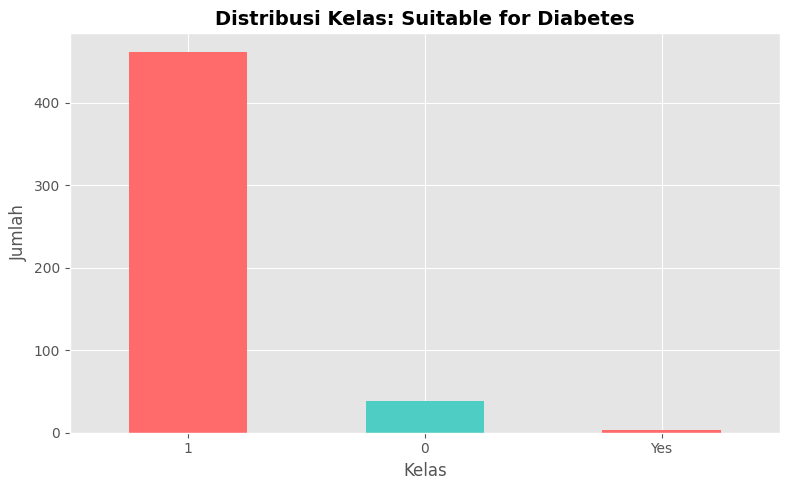

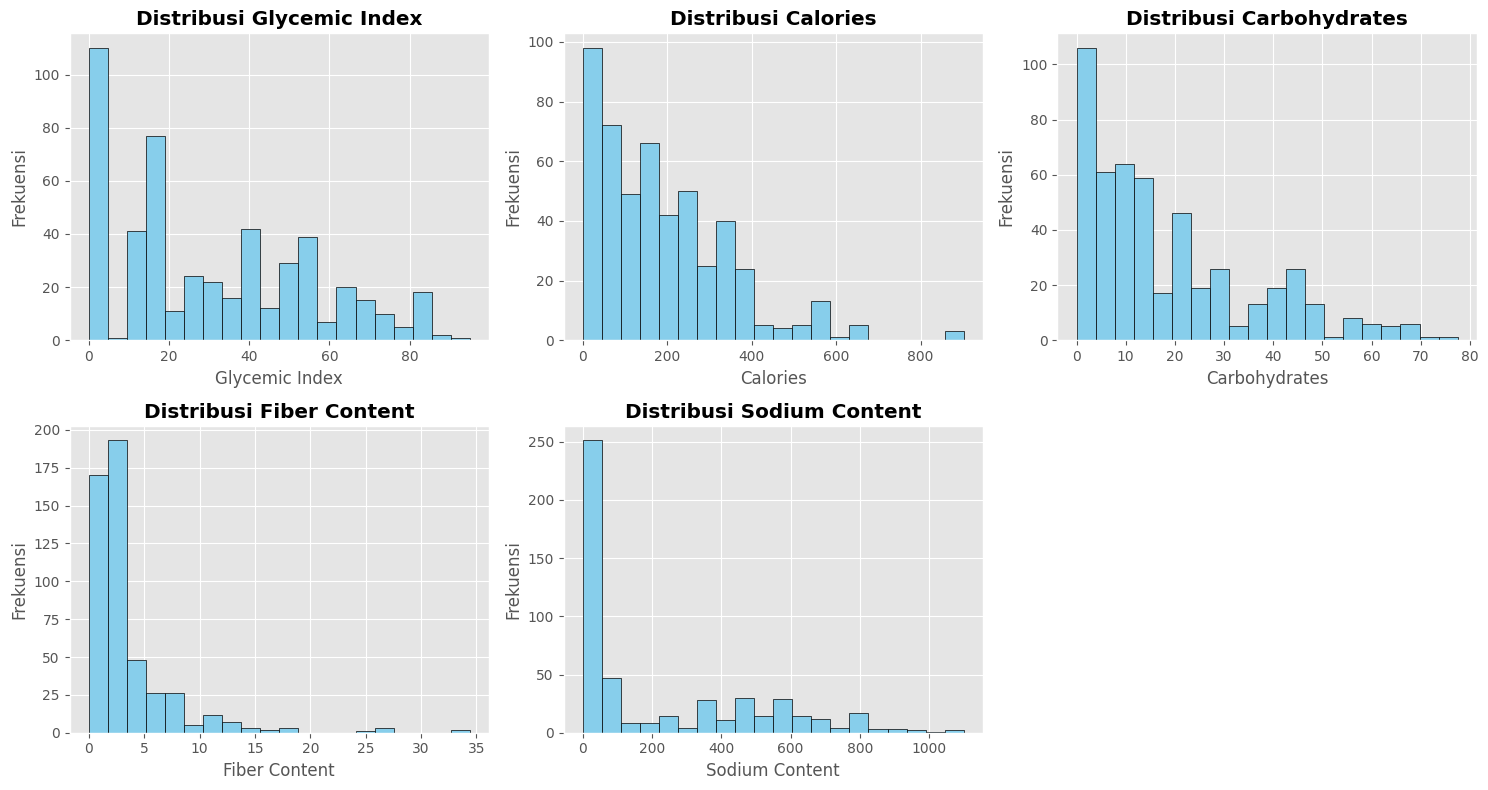

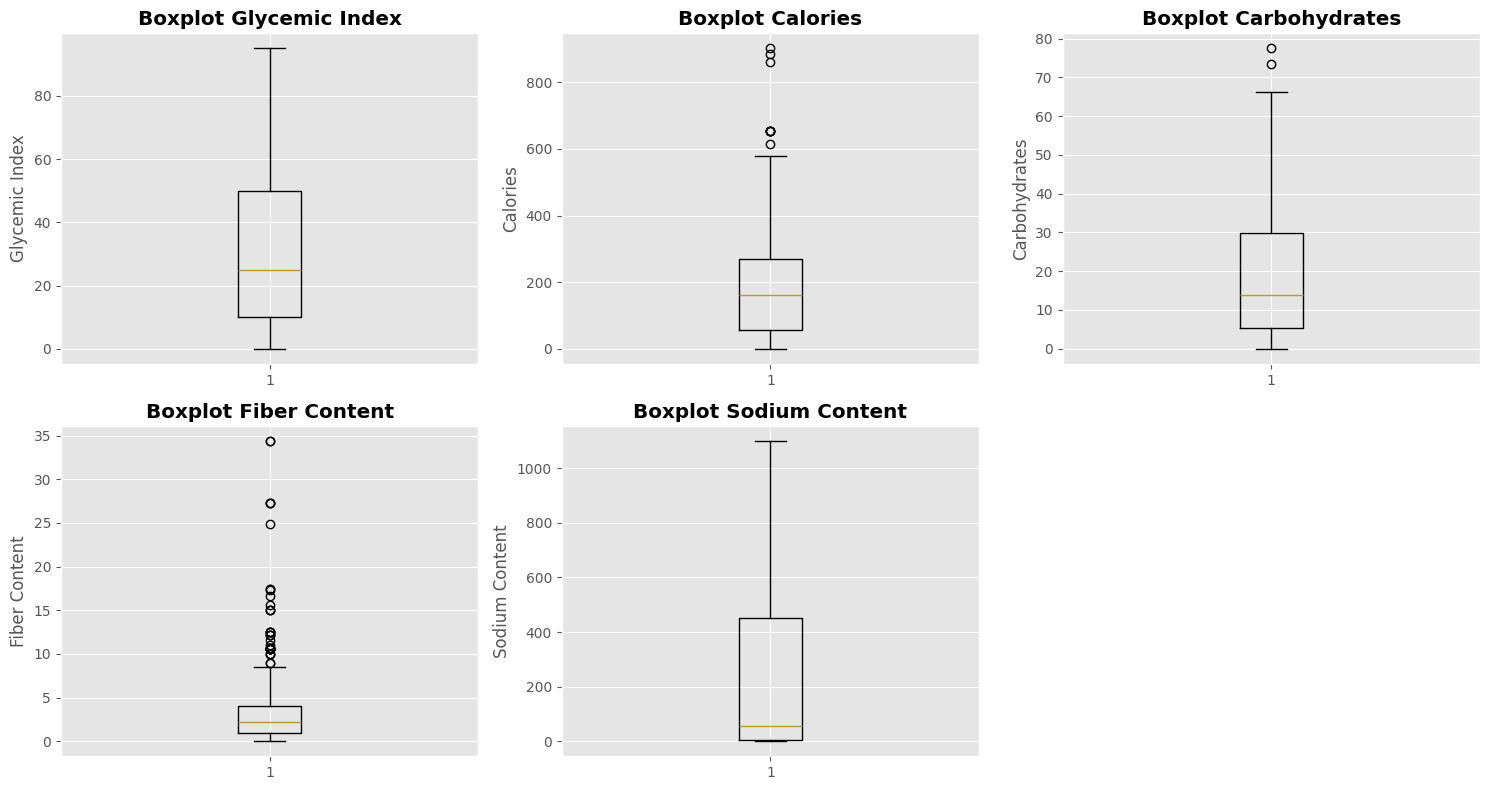

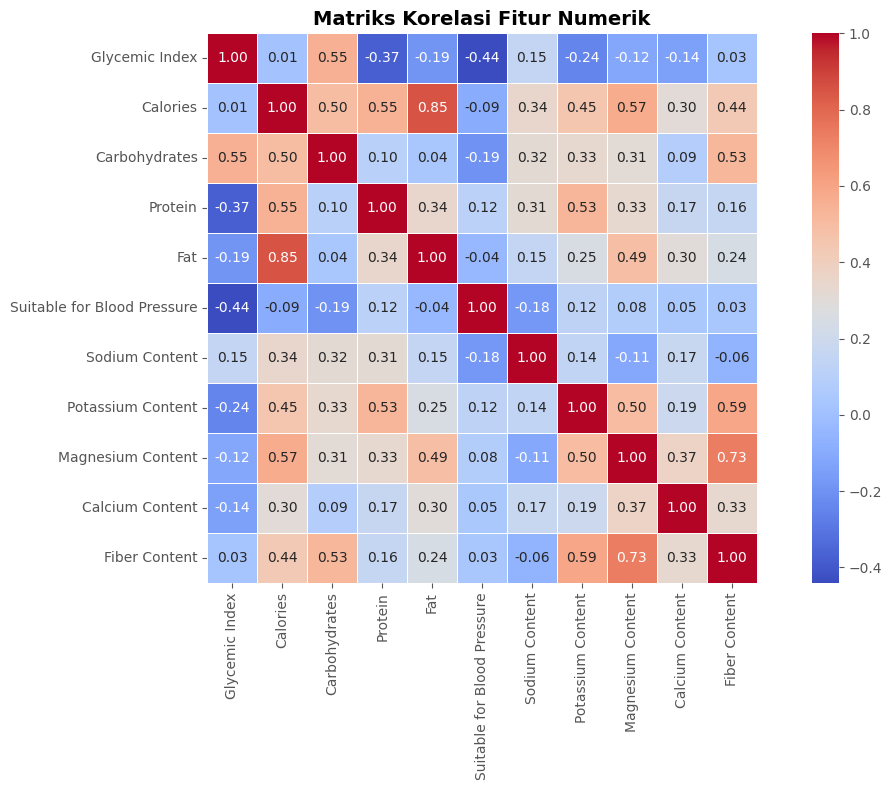

In [15]:
# Ketiga

print("EXPLORATORY DATA ANALYSIS : ")

# PENJELASAN KOLOM PENTING:
# - Kolom Fitur (X): Kandungan nutrisi makanan
#   * Glycemic Index: Indeks glikemik makanan (penting untuk diabetes)
#   * Calories: Jumlah kalori
#   * Carbohydrates: Karbohidrat (gram)
#   * Protein: Protein (gram)
#   * Fat: Lemak (gram)
#   * Sodium Content: Kandungan sodium/natrium
#   * Potassium Content: Kandungan potasium
#   * Magnesium Content: Kandungan magnesium
#   * Calcium Content: Kandungan kalsium
#   * Fiber Content: Kandungan serat
#
# - Kolom Target (y): Label klasifikasi
#   * Suitable for Diabetes: Cocok/tidak untuk penderita diabetes
#   * Suitable for Blood Pressure: Cocok/tidak untuk tekanan darah tinggi

# Cek distribusi kelas target (Suitable for Diabetes)
print("\nDistribusi Kelas Target (Suitable for Diabetes):")
print(df['Suitable for Diabetes'].value_counts())

# Visualisasi 1: Distribusi kelas target
plt.figure(figsize=(8, 5))
df['Suitable for Diabetes'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Distribusi Kelas: Suitable for Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualisasi 2: Distribusi fitur numerik utama
fitur_utama = ['Glycemic Index', 'Calories', 'Carbohydrates', 'Fiber Content', 'Sodium Content']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(fitur_utama):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribusi {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Hapus subplot yang tidak dipakai
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Visualisasi 3: Boxplot untuk melihat outlier
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(fitur_utama):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot {col}', fontweight='bold')
    axes[i].set_ylabel(col)

axes[5].axis('off')
plt.tight_layout()
plt.show()

# Visualisasi 4: Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Keempat

print("PEMILIHAN FITUR DAN TARGET : ")

# Tentukan kolom fitur (X) - semua kolom nutrisi
fitur_cols = [
    'Glycemic Index', 'Calories', 'Carbohydrates', 'Protein', 'Fat',
    'Sodium Content', 'Potassium Content', 'Magnesium Content',
    'Calcium Content', 'Fiber Content'
]

# Tentukan kolom target (y)
target_col = 'Suitable for Diabetes'

print(f"\nFitur yang digunakan (X): {len(fitur_cols)} kolom")
for col in fitur_cols:
    print(f"  - {col}")

print(f"\nTarget yang diprediksi (y): {target_col}")

# Cek apakah ada missing values di kolom yang akan digunakan
print("\nCek Missing Values di Kolom yang Dipilih : ")
cols_to_check = fitur_cols + [target_col]
missing_in_selected = df[cols_to_check].isnull().sum()
print(missing_in_selected[missing_in_selected > 0])

# Handle missing values jika ada (kita isi dengan median untuk fitur numerik)
if df[fitur_cols].isnull().sum().sum() > 0:
    print("\nDitemukan missing values! Mengisi dengan median...")
    for col in fitur_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    print("Missing values telah diisi!")

# Pisahkan fitur (X) dan target (y)
X = df[fitur_cols].copy()
y = df[target_col].copy()

# Encode target jika masih berupa string (Yes/No menjadi 1/0)
# Cek apakah target perlu di-encode
print(f"\nTipe data target sebelum encoding: {y.dtype}")
print(f"Nilai unik target: {y.unique()}")

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print(f"\nTarget berhasil di-encode!")
    print(f"Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    # Simpan encoder untuk digunakan nanti
    target_encoder = le
else:
    target_encoder = None

print(f"\nShape X (fitur): {X.shape}")
print(f"Shape y (target): {y.shape}")

PEMILIHAN FITUR DAN TARGET : 

Fitur yang digunakan (X): 10 kolom
  - Glycemic Index
  - Calories
  - Carbohydrates
  - Protein
  - Fat
  - Sodium Content
  - Potassium Content
  - Magnesium Content
  - Calcium Content
  - Fiber Content

Target yang diprediksi (y): Suitable for Diabetes

Cek Missing Values di Kolom yang Dipilih : 
Series([], dtype: int64)

Tipe data target sebelum encoding: object
Nilai unik target: ['1' 'Yes' '0']

Target berhasil di-encode!
Mapping: {'0': 0, '1': 1, 'Yes': 2}

Shape X (fitur): (502, 10)
Shape y (target): (502,)


In [18]:
# Kelima

print("PREPROCESSING DATA : ")

# Split data menjadi training set (80%) dan test set (20%)
# random_state=42 untuk reproducibility (hasil yang sama setiap dijalankan)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Split Ratio: 80% Training, 20% Testing")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Distribusi kelas di training dan test set
print(f"\nDistribusi kelas di Training Set:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Kelas {label}: {count} ({count/len(y_train)*100:.1f}%)")

print(f"\nDistribusi kelas di Test Set:")
unique, counts = np.unique(y_test, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Kelas {label}: {count} ({count/len(y_test)*100:.1f}%)")

# Scaling fitur numerik dengan StandardScaler
# Scaling penting untuk algoritma seperti Logistic Regression yang sensitif terhadap skala
# StandardScaler: mengubah data agar mean=0 dan std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature Scaling selesai menggunakan StandardScaler!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

PREPROCESSING DATA : 

Data Split Ratio: 80% Training, 20% Testing
X_train shape: (401, 10)
X_test shape: (101, 10)
y_train shape: (401,)
y_test shape: (101,)

Distribusi kelas di Training Set:
  Kelas 0: 30 (7.5%)
  Kelas 1: 368 (91.8%)
  Kelas 2: 3 (0.7%)

Distribusi kelas di Test Set:
  Kelas 0: 8 (7.9%)
  Kelas 1: 93 (92.1%)

Feature Scaling selesai menggunakan StandardScaler!
X_train_scaled shape: (401, 10)
X_test_scaled shape: (101, 10)


PELATIHAN MODEL MACHINE LEARNING
MODEL 1: LOGISTIC REGRESSION : 
Logistic Regression adalah model linear sederhana yang baik sebagai baseline.
Model ini cepat dan mudah diinterpretasi.

Akurasi: 0.9406 (94.06%)
F1-Score (weighted): 0.9237

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.94      1.00      0.97        93

    accuracy                           0.94       101
   macro avg       0.97      0.62      0.68       101
weighted avg       0.94      0.94      0.92       101

Confusion Matrix : 
[[ 2  6]
 [ 0 93]]


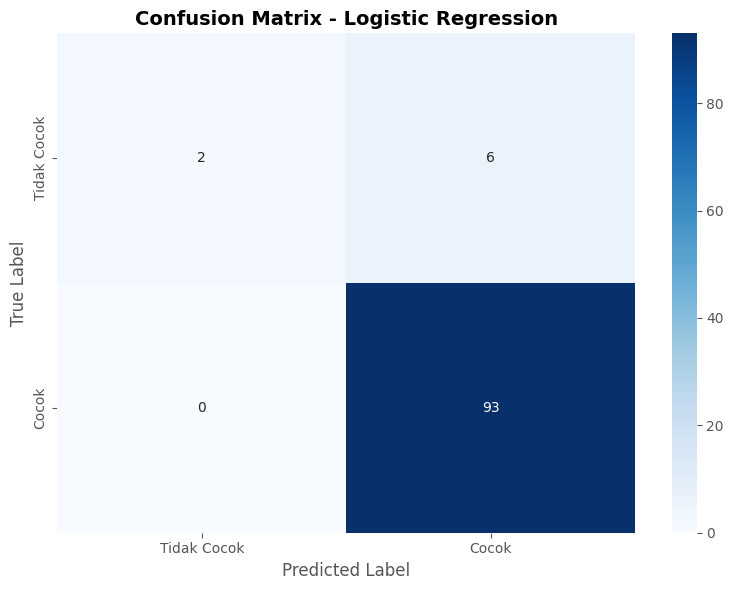

MODEL 2: RANDOM FOREST CLASSIFIER
Random Forest adalah ensemble method yang menggunakan banyak decision tree.
Model ini biasanya lebih akurat dan dapat menangkap pola non-linear yang kompleks.

Akurasi: 0.9505 (95.05%)
F1-Score (weighted): 0.9399

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.95      1.00      0.97        93

    accuracy                           0.95       101
   macro avg       0.97      0.69      0.76       101
weighted avg       0.95      0.95      0.94       101

Confusion Matrix : 
[[ 3  5]
 [ 0 93]]


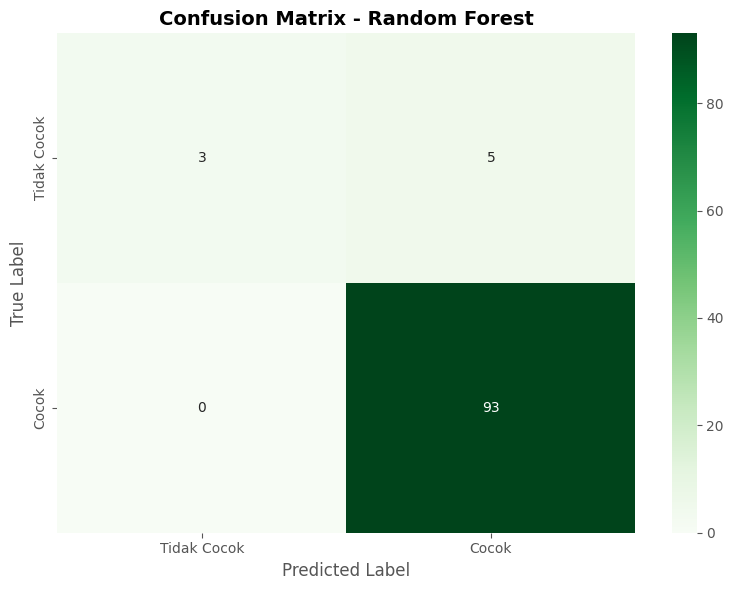


Feature Importance (10 Teratas) : 
             Feature  Importance
0     Glycemic Index    0.345594
2      Carbohydrates    0.110665
4                Fat    0.099303
6  Potassium Content    0.083112
1           Calories    0.073677
3            Protein    0.070780
7  Magnesium Content    0.066729
5     Sodium Content    0.057705
8    Calcium Content    0.049981
9      Fiber Content    0.042453


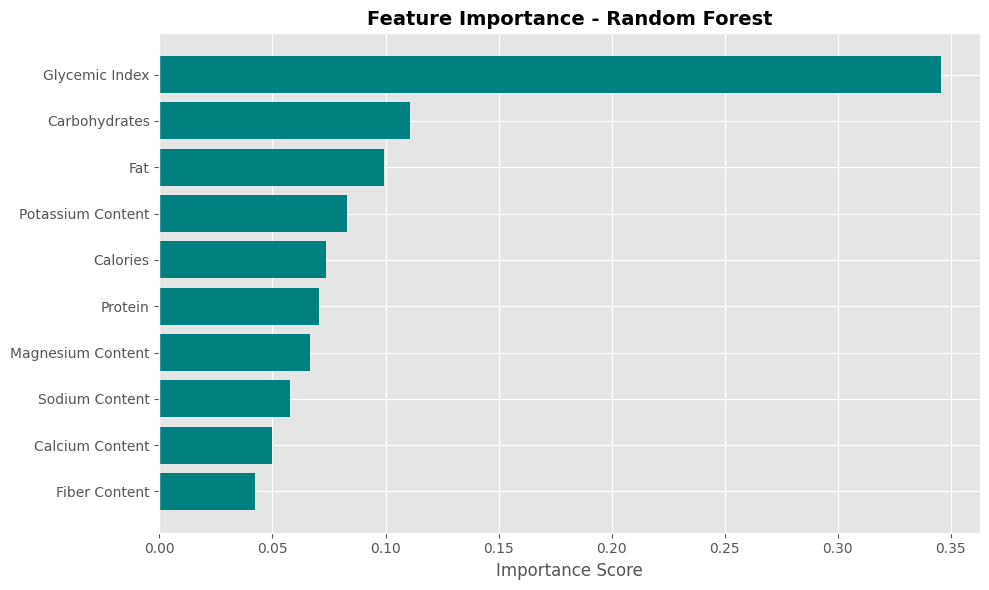

In [19]:
# Keenam

print("PELATIHAN MODEL MACHINE LEARNING")

# Dictionary untuk menyimpan hasil model
model_results = {}

# model 1: logistic regression
print("MODEL 1: LOGISTIC REGRESSION : ")
print("Logistic Regression adalah model linear sederhana yang baik sebagai baseline.")
print("Model ini cepat dan mudah diinterpretasi.")

# Inisialisasi dan training
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluasi
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\nAkurasi: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"F1-Score (weighted): {lr_f1:.4f}")

print("\nClassification Report : ")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix : ")
print(cm_lr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Cocok', 'Cocok'],
            yticklabels=['Tidak Cocok', 'Cocok'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Simpan hasil
model_results['Logistic Regression'] = {
    'model': lr_model,
    'accuracy': lr_accuracy,
    'f1_score': lr_f1,
    'predictions': y_pred_lr,
    'confusion_matrix': cm_lr
}


# model 2: random forest
print("MODEL 2: RANDOM FOREST CLASSIFIER")
print("Random Forest adalah ensemble method yang menggunakan banyak decision tree.")
print("Model ini biasanya lebih akurat dan dapat menangkap pola non-linear yang kompleks.")

# Inisialisasi dan training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluasi
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\nAkurasi: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"F1-Score (weighted): {rf_f1:.4f}")

print("\nClassification Report : ")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix : ")
print(cm_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Tidak Cocok', 'Cocok'],
            yticklabels=['Tidak Cocok', 'Cocok'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature Importance dari Random Forest
feature_importance = pd.DataFrame({
    'Feature': fitur_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (10 Teratas) : ")
print(feature_importance.head(10))

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Simpan hasil
model_results['Random Forest'] = {
    'model': rf_model,
    'accuracy': rf_accuracy,
    'f1_score': rf_f1,
    'predictions': y_pred_rf,
    'confusion_matrix': cm_rf
}

PERBANDINGAN DAN PEMILIHAN MODEL TERBAIK

Tabel Perbandingan Model : 
              Model  Accuracy  F1-Score
Logistic Regression  0.940594  0.923700
      Random Forest  0.950495  0.939892


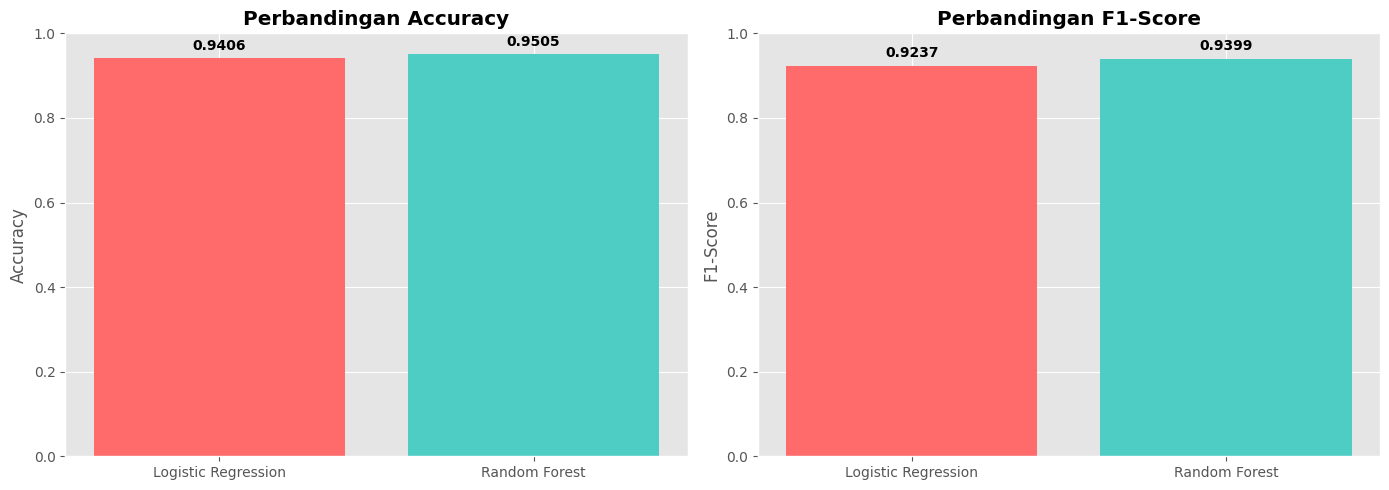


MODEL TERBAIK : Random Forest
   - Accuracy: 0.9505
   - F1-Score: 0.9399

PENJELASAN : 
Random Forest dipilih sebagai model terbaik karena:
  1. Akurasi dan F1-Score lebih tinggi dibanding Logistic Regression
  2. Mampu menangkap pola non-linear yang lebih kompleks
  3. Robust terhadap outlier dan overfitting
  4. Memberikan informasi feature importance yang berguna

Menyimpan model terbaik ke file...
Model berhasil disimpan!
  - best_diabetes_food_model.pkl (model)
  - scaler.pkl (scaler untuk preprocessing)
  - target_encoder.pkl (encoder untuk target)


In [20]:
# Ketujuh

print("PERBANDINGAN DAN PEMILIHAN MODEL TERBAIK")

# Bandingkan performa semua model
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [model_results[m]['accuracy'] for m in model_results],
    'F1-Score': [model_results[m]['f1_score'] for m in model_results]
})

print("\nTabel Perbandingan Model : ")
print(comparison_df.to_string(index=False))

# Visualisasi perbandingan
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
ax[0].bar(comparison_df['Model'], comparison_df['Accuracy'], color=['#FF6B6B', '#4ECDC4'])
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Perbandingan Accuracy', fontweight='bold')
ax[0].set_ylim([0, 1])
for i, v in enumerate(comparison_df['Accuracy']):
    ax[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# F1-Score comparison
ax[1].bar(comparison_df['Model'], comparison_df['F1-Score'], color=['#FF6B6B', '#4ECDC4'])
ax[1].set_ylabel('F1-Score')
ax[1].set_title('Perbandingan F1-Score', fontweight='bold')
ax[1].set_ylim([0, 1])
for i, v in enumerate(comparison_df['F1-Score']):
    ax[1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Pilih model terbaik berdasarkan F1-Score
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']

print(f"\nMODEL TERBAIK : {best_model_name}")
print(f"   - Accuracy: {model_results[best_model_name]['accuracy']:.4f}")
print(f"   - F1-Score: {model_results[best_model_name]['f1_score']:.4f}")

print("\nPENJELASAN : ")
if best_model_name == 'Random Forest':
    print("Random Forest dipilih sebagai model terbaik karena:")
    print("  1. Akurasi dan F1-Score lebih tinggi dibanding Logistic Regression")
    print("  2. Mampu menangkap pola non-linear yang lebih kompleks")
    print("  3. Robust terhadap outlier dan overfitting")
    print("  4. Memberikan informasi feature importance yang berguna")
else:
    print("Logistic Regression dipilih sebagai model terbaik karena:")
    print("  1. Performa akurasi dan F1-Score paling baik")
    print("  2. Model lebih sederhana dan cepat")
    print("  3. Lebih mudah diinterpretasi")
    print("  4. Efisien untuk deployment")

# Simpan model terbaik ke file
print("\nMenyimpan model terbaik ke file...")
joblib.dump(best_model, 'best_diabetes_food_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
if target_encoder is not None:
    joblib.dump(target_encoder, 'target_encoder.pkl')

print("Model berhasil disimpan!")
print("  - best_diabetes_food_model.pkl (model)")
print("  - scaler.pkl (scaler untuk preprocessing)")
if target_encoder is not None:
    print("  - target_encoder.pkl (encoder untuk target)")

In [21]:
# Kedelapan

print("FUNGSI PREDIKSI UNTUK MAKANAN BARU")

def predict_food_suitability(input_dict):
    """
    Fungsi untuk memprediksi kesesuaian makanan untuk penderita diabetes.
    
    Parameter:
    ----------
    input_dict : dict
        Dictionary berisi nilai nutrisi makanan dengan key:
        - 'Glycemic Index': float
        - 'Calories': float
        - 'Carbohydrates': float
        - 'Protein': float
        - 'Fat': float
        - 'Sodium Content': float
        - 'Potassium Content': float
        - 'Magnesium Content': float
        - 'Calcium Content': float
        - 'Fiber Content': float
    
    Returns:
    --------
    result : dict
        Dictionary berisi:
        - 'prediction': int (0=Tidak Cocok, 1=Cocok)
        - 'label': str ('Tidak Cocok untuk Diabetes' atau 'Cocok untuk Diabetes')
        - 'probability': array (probabilitas untuk setiap kelas)
    """
    # Load model dan scaler yang sudah disimpan
    model = joblib.load('best_diabetes_food_model.pkl')
    scaler = joblib.load('scaler.pkl')
    
    # Konversi input dictionary ke DataFrame
    input_df = pd.DataFrame([input_dict])
    
    # Pastikan urutan kolom sesuai dengan training
    input_df = input_df[fitur_cols]
    
    # Scaling
    input_scaled = scaler.transform(input_df)
    
    # Prediksi
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0]
    
    # Mapping label
    if target_encoder is not None:
        label = target_encoder.inverse_transform([prediction])[0]
    else:
        label = "Cocok untuk Diabetes" if prediction == 1 else "Tidak Cocok untuk Diabetes"
    
    # Return hasil
    result = {
        'prediction': int(prediction),
        'label': label,
        'probability': probability,
        'confidence': float(max(probability))
    }
    
    return result

print("\nFungsi predict_food_suitability() berhasil dibuat!")
print("\nCara penggunaan:")
print("  result = predict_food_suitability({")
print("      'Glycemic Index': 55,")
print("      'Calories': 150,")
print("      'Carbohydrates': 30,")
print("      ... (fitur lainnya)")
print("  })")


# contoh : 
print("\n")
print("CONTOH PENGGUNAAN FUNGSI PREDIKSI")

# Contoh 1: Makanan dengan nilai nutrisi rendah gula/karbohidrat (seharusnya cocok)
contoh_makanan_1 = {
    'Glycemic Index': 35,
    'Calories': 120,
    'Carbohydrates': 15,
    'Protein': 8,
    'Fat': 5,
    'Sodium Content': 100,
    'Potassium Content': 250,
    'Magnesium Content': 50,
    'Calcium Content': 100,
    'Fiber Content': 8
}

print("\nContoh Makanan 1 (Makanan sehat - rendah GI & tinggi serat) :")
print(f"  Input: {contoh_makanan_1}")
hasil_1 = predict_food_suitability(contoh_makanan_1)
print(f"\n  Hasil Prediksi: {hasil_1['label']}")
print(f"  Confidence: {hasil_1['confidence']:.2%}")
print(f"  Probabilitas: Tidak Cocok={hasil_1['probability'][0]:.2%}, Cocok={hasil_1['probability'][1]:.2%}")

# Contoh 2: Makanan dengan nilai nutrisi tinggi gula/karbohidrat (seharusnya tidak cocok)
contoh_makanan_2 = {
    'Glycemic Index': 85,
    'Calories': 350,
    'Carbohydrates': 60,
    'Protein': 3,
    'Fat': 15,
    'Sodium Content': 400,
    'Potassium Content': 100,
    'Magnesium Content': 20,
    'Calcium Content': 50,
    'Fiber Content': 2
}

print("\n\nContoh Makanan 2 (Makanan manis - tinggi GI & rendah serat):")
print(f"  Input: {contoh_makanan_2}")
hasil_2 = predict_food_suitability(contoh_makanan_2)
print(f"\n  Hasil Prediksi: {hasil_2['label']}")
print(f"  Confidence: {hasil_2['confidence']:.2%}")
print(f"  Probabilitas: Tidak Cocok={hasil_2['probability'][0]:.2%}, Cocok={hasil_2['probability'][1]:.2%}")


FUNGSI PREDIKSI UNTUK MAKANAN BARU

Fungsi predict_food_suitability() berhasil dibuat!

Cara penggunaan:
  result = predict_food_suitability({
      'Glycemic Index': 55,
      'Calories': 150,
      'Carbohydrates': 30,
      ... (fitur lainnya)
  })


CONTOH PENGGUNAAN FUNGSI PREDIKSI

Contoh Makanan 1 (Makanan sehat - rendah GI & tinggi serat) :
  Input: {'Glycemic Index': 35, 'Calories': 120, 'Carbohydrates': 15, 'Protein': 8, 'Fat': 5, 'Sodium Content': 100, 'Potassium Content': 250, 'Magnesium Content': 50, 'Calcium Content': 100, 'Fiber Content': 8}

  Hasil Prediksi: 1
  Confidence: 100.00%
  Probabilitas: Tidak Cocok=0.00%, Cocok=100.00%


Contoh Makanan 2 (Makanan manis - tinggi GI & rendah serat):
  Input: {'Glycemic Index': 85, 'Calories': 350, 'Carbohydrates': 60, 'Protein': 3, 'Fat': 15, 'Sodium Content': 400, 'Potassium Content': 100, 'Magnesium Content': 20, 'Calcium Content': 50, 'Fiber Content': 2}

  Hasil Prediksi: 0
  Confidence: 67.00%
  Probabilitas: Tidak Cocok=

In [22]:
# Kesembilan

print("\n")
print("CATATAN UNTUK INTEGRASI KE WEB")

print("""
PANDUAN INTEGRASI KE APLIKASI WEB:

1. PERSIAPAN FILE:
   - Upload 3 file yang sudah disimpan ke server web:
     * best_diabetes_food_model.pkl (model ML)
     * scaler.pkl (preprocessing scaler)
     * target_encoder.pkl (encoder untuk label, jika ada)

2. PILIHAN FRAMEWORK WEB:
   
   A. Menggunakan FLASK (Lightweight, Fleksibel):
      - Install: pip install flask
      - Buat file app.py dengan route API
      - Contoh endpoint: POST /predict
      - Input: JSON dengan data nutrisi makanan
      - Output: JSON dengan hasil prediksi
   
   B. Menggunakan STREAMLIT (Cepat, Interaktif):
      - Install: pip install streamlit
      - Buat UI form untuk input nutrisi
      - Real-time prediction dengan widget interaktif
      - Deploy mudah ke Streamlit Cloud
   
   C. Menggunakan FASTAPI (Modern, Cepat):
      - Install: pip install fastapi uvicorn
      - Auto-generate API documentation
      - Type checking dengan Pydantic
      - Performance tinggi untuk production

3. STRUKTUR KODE BACKEND:
   ```python
   # Load model saat aplikasi start
   model = joblib.load('best_diabetes_food_model.pkl')
   scaler = joblib.load('scaler.pkl')
   
   # Endpoint untuk prediksi
   @app.route('/predict', methods=['POST'])
   def predict():
       data = request.get_json()
       # Gunakan fungsi predict_food_suitability()
       result = predict_food_suitability(data)
       return jsonify(result)
   ```

4. FRONTEND (HTML/JavaScript):
   - Buat form input untuk 10 fitur nutrisi
   - Kirim data via AJAX/Fetch ke endpoint backend
   - Tampilkan hasil prediksi secara user-friendly
   - Tambahkan visualisasi (chart, progress bar)

5. DEPLOYMENT:
   - Local: python app.py (untuk testing)
   - Cloud: Heroku, Railway, Render, Google Cloud, AWS
   - Untuk Streamlit: streamlit run app.py

6. TIPS TAMBAHAN:
   - Validasi input (pastikan nilai dalam range yang wajar)
   - Error handling yang baik
   - Logging untuk monitoring
   - Caching untuk performa
   - Rate limiting untuk mencegah abuse

   Referensi Framework:
   - Flask: https://flask.palletsprojects.com/
   - Streamlit: https://streamlit.io/
   - FastAPI: https://fastapi.tiangolo.com/

   Untuk sekarang, fokus kita adalah membuat model ML yang akurat.
   Integrasi web akan menjadi tahap berikutnya setelah model sudah siap.
""")

print("\n" )
print("NOTEBOOK SELESAI!")
print("\nRINGKASAN:")
print("  1. Dataset berhasil di-load dan dianalisis")
print("  2. EDA dan visualisasi selesai")
print("  3. Preprocessing dan feature engineering selesai")
print("  4. 2 model ML berhasil dilatih dan dievaluasi")
print(f"  5. Model terbaik: {best_model_name}")
print(f"  6. Akurasi: {model_results[best_model_name]['accuracy']:.2%}")
print("  7. Model disimpan dan siap untuk deployment")
print("  8. Fungsi prediksi siap digunakan")
print("\nProyek Food Recommendation Assistant siap dipresentasikan!")



CATATAN UNTUK INTEGRASI KE WEB

PANDUAN INTEGRASI KE APLIKASI WEB:

1. PERSIAPAN FILE:
   - Upload 3 file yang sudah disimpan ke server web:
     * best_diabetes_food_model.pkl (model ML)
     * scaler.pkl (preprocessing scaler)
     * target_encoder.pkl (encoder untuk label, jika ada)

2. PILIHAN FRAMEWORK WEB:
   
   A. Menggunakan FLASK (Lightweight, Fleksibel):
      - Install: pip install flask
      - Buat file app.py dengan route API
      - Contoh endpoint: POST /predict
      - Input: JSON dengan data nutrisi makanan
      - Output: JSON dengan hasil prediksi
   
   B. Menggunakan STREAMLIT (Cepat, Interaktif):
      - Install: pip install streamlit
      - Buat UI form untuk input nutrisi
      - Real-time prediction dengan widget interaktif
      - Deploy mudah ke Streamlit Cloud
   
   C. Menggunakan FASTAPI (Modern, Cepat):
      - Install: pip install fastapi uvicorn
      - Auto-generate API documentation
      - Type checking dengan Pydantic
      - Performance tinggi